In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598,598,598,586.000000,598,598,598.000000,598.000000,577.000000,584.000000,549.000000,598,598
unique,598,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,388,NaN,465,488,NaN,NaN,NaN,NaN,NaN,225,411
mean,NaN,NaN,NaN,0.755973,NaN,NaN,5292.252508,1631.499866,144.968804,341.917808,0.843352,NaN,NaN
std,NaN,NaN,NaN,1.007751,NaN,NaN,5807.265364,2953.315785,82.704182,65.205994,0.363800,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3806.000000,1211.500000,127.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,1.750000,NaN,NaN,5746.000000,2324.000000,167.000000,360.000000,1.000000,NaN,NaN


In [4]:
df.Married.replace(['No','Yes'],[0,1],inplace=True)

In [5]:
df.Gender.replace(['Male','Female'],[0,1],inplace=True)

In [6]:
df.Dependents.replace(['0.0','1.0','2.0','3.0'],[0,1,2,3],inplace=True)

In [7]:
df.Education.replace(['Not Graduate','Graduate'],[0,1],inplace=True)

In [8]:
df.Self_Employed.replace(['No','Yes'],[0,1],inplace=True)

In [9]:
df.Property_Area.replace(['Rural','Semiurban','Urban'],[0,1,2],inplace=True)

In [10]:
df.Loan_Status.replace(['N','Y'],[0,1],inplace=True)

In [11]:
print(df.describe(include='all'))

         Loan_ID      Gender     Married  Dependents   Education  \
count        598  598.000000  598.000000  586.000000  598.000000   
unique       598         NaN         NaN         NaN         NaN   
top     LP001002         NaN         NaN         NaN         NaN   
freq           1         NaN         NaN         NaN         NaN   
mean         NaN    0.185619    0.648829    0.755973    0.777592   
std          NaN    0.389124    0.477736    1.007751    0.416212   
min          NaN    0.000000    0.000000    0.000000    0.000000   
25%          NaN    0.000000    0.000000    0.000000    1.000000   
50%          NaN    0.000000    1.000000    0.000000    1.000000   
75%          NaN    0.000000    1.000000    1.750000    1.000000   
max          NaN    1.000000    1.000000    3.000000    1.000000   

        Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count      598.000000       598.000000         598.000000  577.000000   
unique            NaN              Na

In [12]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

###### Null values count

In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

#### Visualising Null values using heatmap

<AxesSubplot:>

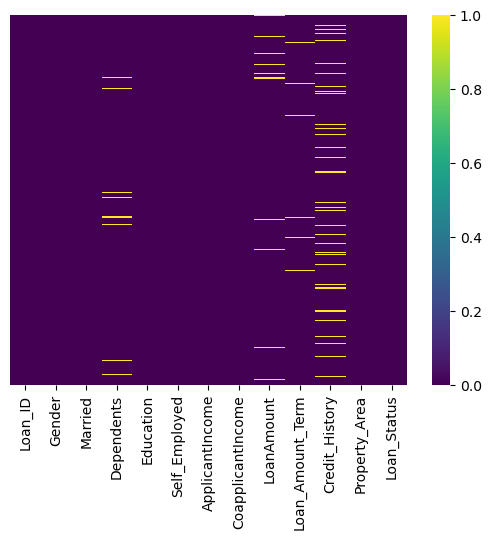

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

##### Handling Null Values

<AxesSubplot:>

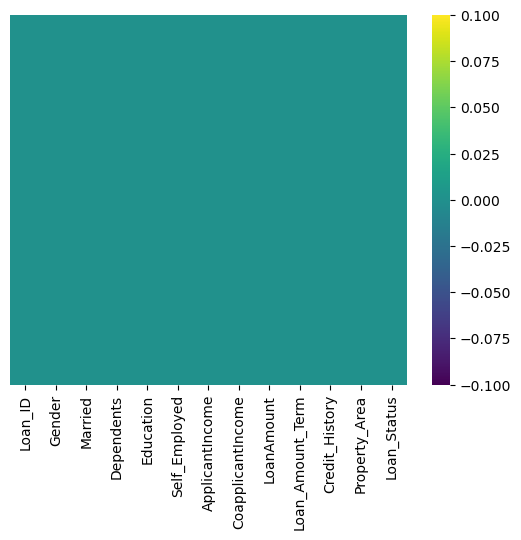

In [15]:
df.Dependents.fillna(0,inplace=True)
df.Credit_History.fillna(0,inplace=True)
df.LoanAmount.fillna(0,inplace=True)
df.Loan_Amount_Term.fillna(0,inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [16]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
unique,598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.185619,0.648829,0.740803,0.777592,0.183946,5292.252508,1631.499866,139.877926,333.913043,0.774247,1.038462,0.687291
std,NaN,0.389124,0.477736,1.003198,0.416212,0.387765,5807.265364,2953.315785,85.514171,82.640708,0.418427,0.789499,0.463985
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,97.250000,360.000000,1.000000,0.000000,0.000000
50%,NaN,0.000000,1.000000,0.000000,1.000000,0.000000,3806.000000,1211.500000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,NaN,0.000000,1.000000,1.000000,1.000000,0.000000,5746.000000,2324.000000,163.500000,360.000000,1.000000,2.000000,1.000000


#### Checkinf correlation of every attribute with our target attribute "Loan  status"

In [17]:
f=df.columns[2:-1]
print('Correlation of every attribute with our target attribute "Loan  status":\n')
for i in f:
    corr=df[i].corr(df['Loan_Status'])
    print(i,':',corr)

Correlation of every attribute with our target attribute "Loan  status":

Married : 0.09318283276554319
Dependents : 0.009104850848783944
Education : 0.08161742785624296
Self_Employed : -0.005604727897362878
ApplicantIncome : -0.02524841707927245
CoapplicantIncome : -0.05819401309935648
LoanAmount : -0.024436160603578186
Loan_Amount_Term : 0.010734998842105227
Credit_History : 0.42953081770008766
Property_Area : 0.028315392950963365


#### Checking for outliers

f,axes=plt.subplots(3,2,figsize=(20,50))
sns.displot(df["LoanAmount"],ax=axes[0][0])
plt.grid()
sns.boxplot(y="LoanAmount",data=df,palette="winter",ax=axes[0][1])
plt.grid()

sns.displot(df["LoanAmount"],ax=axes[1][0])
plt.grid()
sns.boxplot(y="LoanAmount",data=df,palette="winter",ax=axes[0][1])
plt.grid()

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

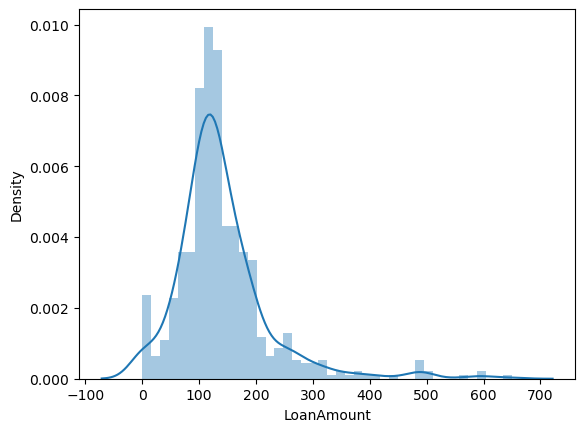

In [18]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:ylabel='LoanAmount'>

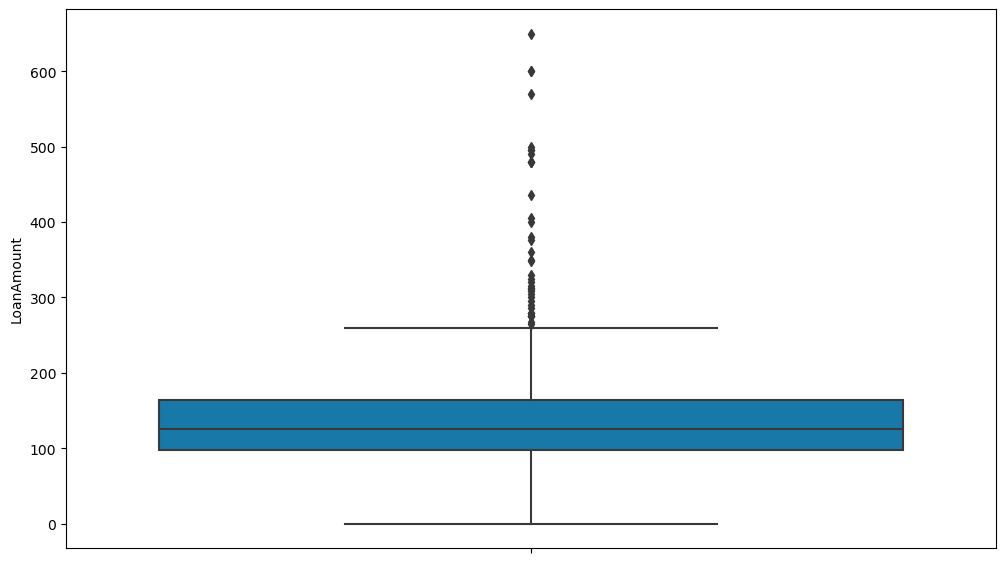

In [19]:
plt.figure(figsize=(12,7))
sns.boxplot(y ='LoanAmount',  data = df, palette = 'winter')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

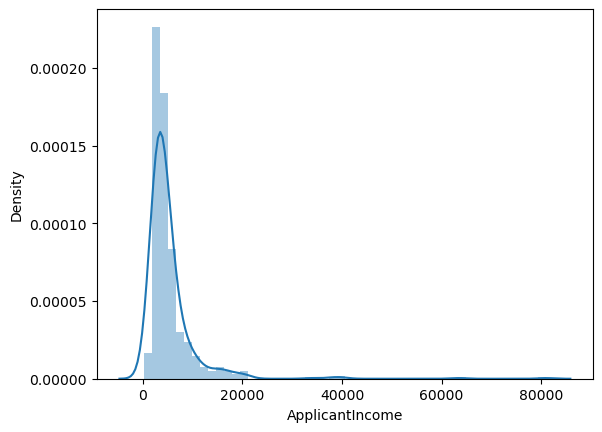

In [20]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:ylabel='ApplicantIncome'>

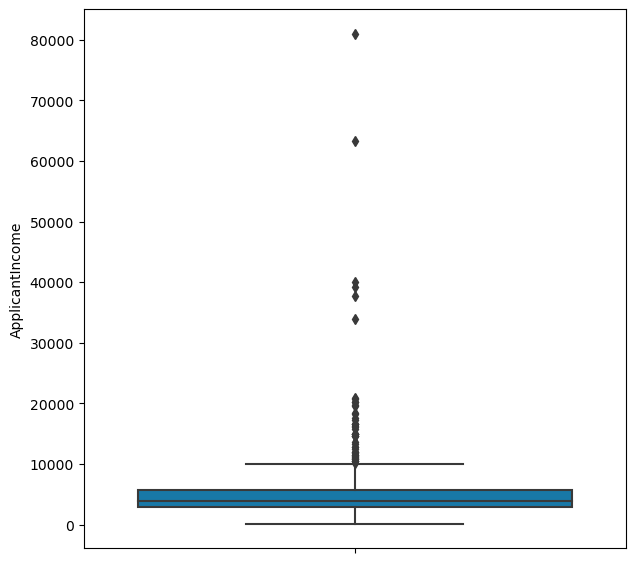

In [21]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='ApplicantIncome',  data = df, palette = 'winter')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

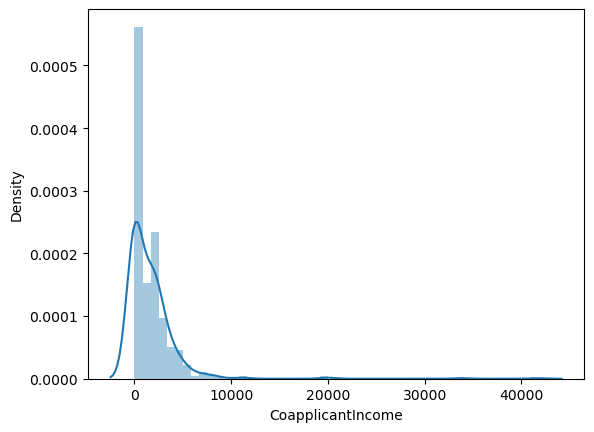

In [22]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:ylabel='CoapplicantIncome'>

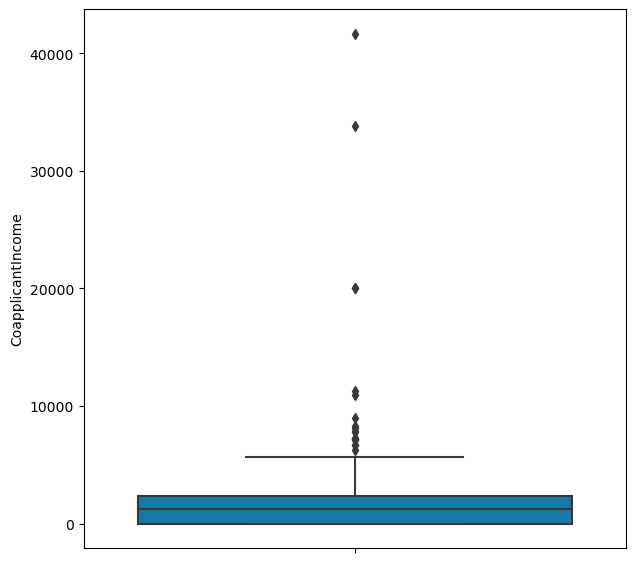

In [23]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='CoapplicantIncome',  data = df, palette = 'winter')

In [24]:
mad=1.4826*np.median(np.abs(df.ApplicantIncome-df.ApplicantIncome.median()))
size_outlr_mad=df.ApplicantIncome
size_outlr_mad[((df.ApplicantIncome-df.ApplicantIncome.median()).abs()>3*mad)]=df.ApplicantIncome.median() 
print("Applicant Income MAD:\n", size_outlr_mad.median())

#Handling 'Coapplicant Income column
mad=1.4826*np.median(np.abs(df.CoapplicantIncome-df.CoapplicantIncome.median()))
size_outlr_mad=df.CoapplicantIncome
size_outlr_mad[((df.CoapplicantIncome-df.CoapplicantIncome.median()).abs()>3*mad)]=df.CoapplicantIncome.median()
print("Coapplicant Income MAD:\n",size_outlr_mad.median())

# Handling 'LoanAmount' column
mad=1.4826*np.median(np.abs(df.LoanAmount-df.LoanAmount.median()))
size_outlr_mad=df.LoanAmount
size_outlr_mad[((df.LoanAmount-df.LoanAmount.median()).abs()>3*mad)]=df.LoanAmount.median()
print("LoanAmount MAD:\n",size_outlr_mad.median())

Applicant Income MAD:
 3803.0
Coapplicant Income MAD:
 1210.75
LoanAmount MAD:
 125.0


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

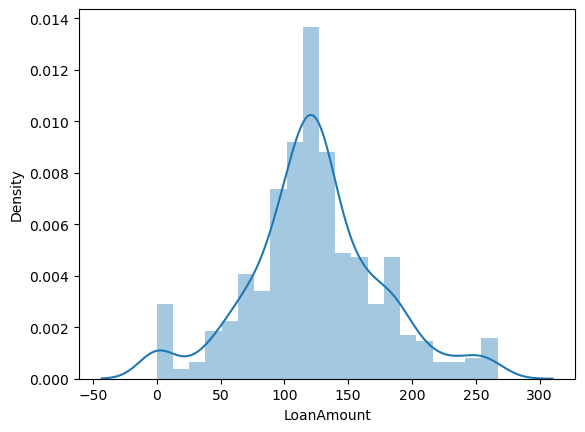

In [25]:
sns.distplot(df['LoanAmount'])


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

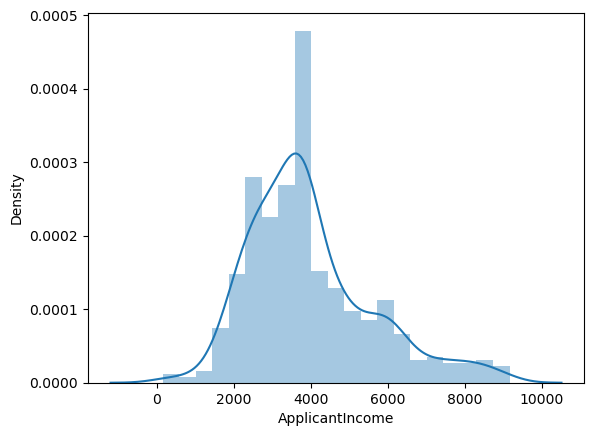

In [26]:
sns.distplot(df['ApplicantIncome'])


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

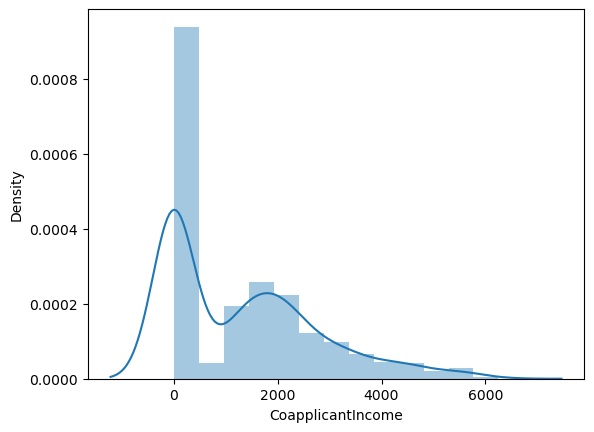

In [27]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:ylabel='LoanAmount'>

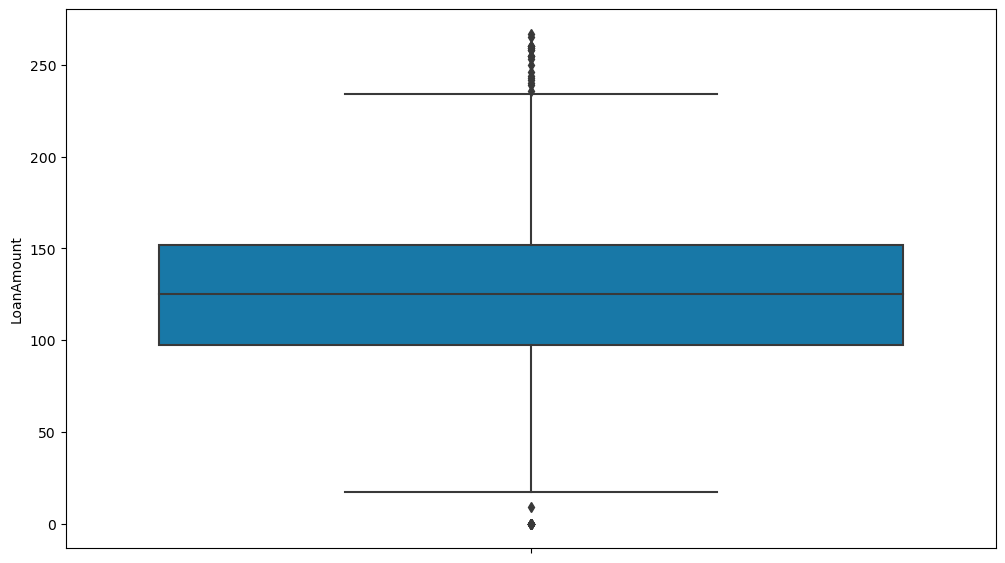

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(y ='LoanAmount',  data = df, palette = 'winter')

<AxesSubplot:ylabel='ApplicantIncome'>

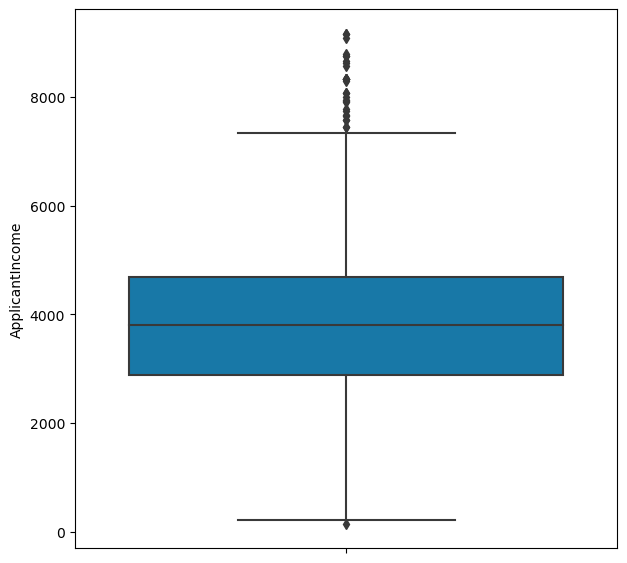

In [29]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='ApplicantIncome',  data = df, palette = 'winter')

<AxesSubplot:ylabel='CoapplicantIncome'>

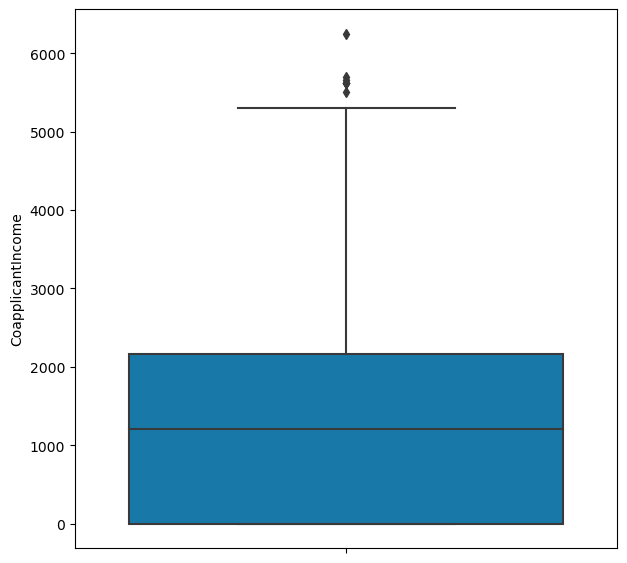

In [30]:
plt.figure(figsize=(7,7))
sns.boxplot(y ='CoapplicantIncome',  data = df, palette = 'winter')

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

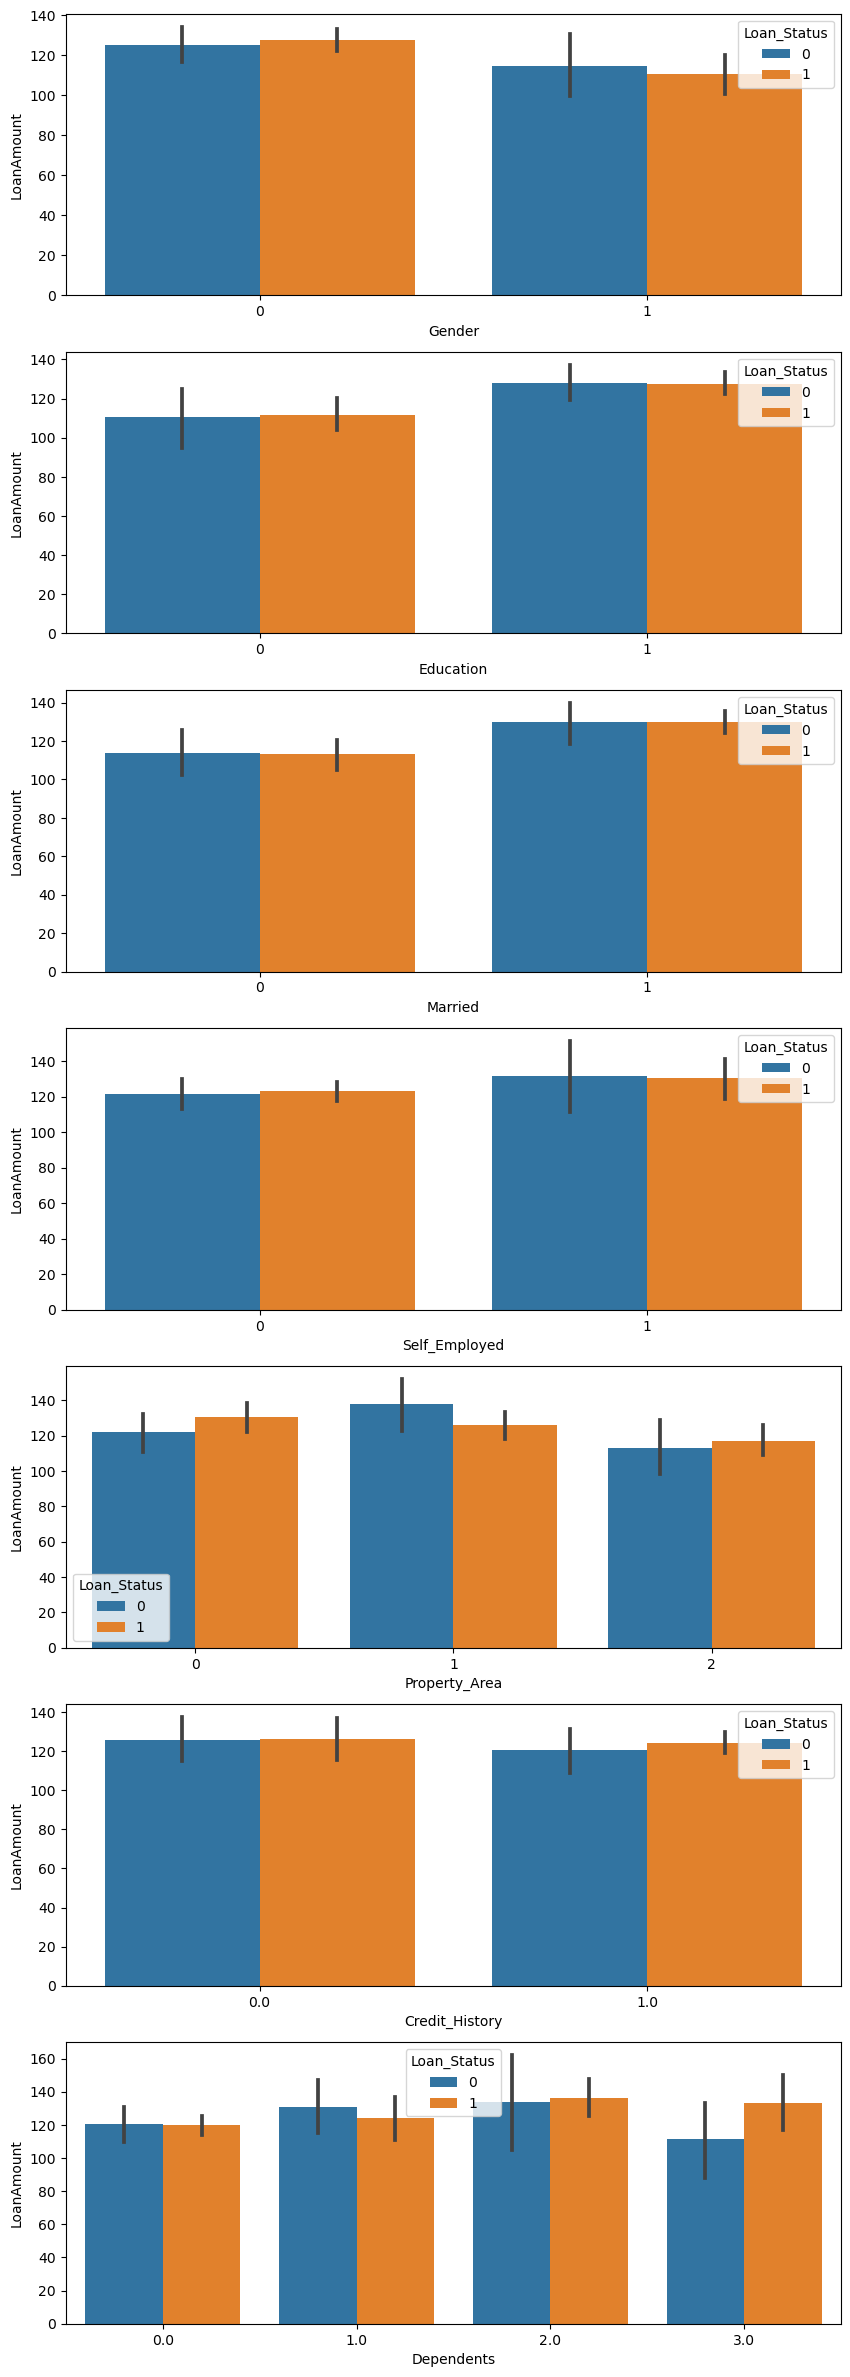

In [31]:
f, axes = plt.subplots(7, 1, figsize=(10, 30)) 
sns.barplot(x = df.Gender, y = df.LoanAmount, hue = df.Loan_Status, ax = axes[0])
sns.barplot(x = df.Education, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[1])
sns.barplot(x = df.Married, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[2])
sns.barplot(x = df.Self_Employed, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[3])
sns.barplot(x = df.Property_Area, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[4])
sns.barplot(x = df.Credit_History, y = df.LoanAmount, hue=df.Loan_Status, ax = axes[5])
sns.barplot(x = df.Dependents, y = df.LoanAmount, hue = df.Loan_Status, ax = axes[6])

### Random Forest Classifer

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
df['is_train']=np.random.uniform(0,1,len(df))<=0.75
train,test=df[df['is_train']==True],df[df['is_train']==False]
print("No of training dataframes:",len(train))
print("No of testing dataframes:",len(test))

No of training dataframes: 444
No of testing dataframes: 154


In [34]:
f=df.columns[1:12]
print(f)
y=train['Loan_Status']
cif=RandomForestClassifier(n_jobs=2,n_estimators=100,random_state=0,verbose=1)
print(cif)
cif.fit(train[f],y)
preds=cif.predict(test[f])
print(preds)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
RandomForestClassifier(n_jobs=2, random_state=0, verbose=1)
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1
 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [35]:
pd.crosstab(test['Loan_Status'],preds,rownames=['Actual Loan_Status'],colnames=['Predicted Loan_Status'])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,20,33
1,15,86


In [36]:
z=test['Loan_Status']
cif.score(test[f],z)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


0.6883116883116883

In [37]:
list(zip(train[f],cif.feature_importances_))

[('Gender', 0.02276064901091577),
 ('Married', 0.028558434991002926),
 ('Dependents', 0.05587902489996814),
 ('Education', 0.031736009903305676),
 ('Self_Employed', 0.023111566168153467),
 ('ApplicantIncome', 0.2181262432724758),
 ('CoapplicantIncome', 0.12695467783152464),
 ('LoanAmount', 0.21028880838845207),
 ('Loan_Amount_Term', 0.04129461393902913),
 ('Credit_History', 0.18055921589607443),
 ('Property_Area', 0.060730755699097985)]

In [38]:
final_Dataset=df.copy()
final_Dataset=final_Dataset.drop(['Loan_ID','Education','Gender','Married',\
                                 'Dependents','Self_Employed','Loan_Amount_Term','is_train'],axis=1)
final_Dataset.describe(include='all')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,3960.060201,1296.585987,124.030100,0.774247,1.038462,0.687291
std,1616.192898,1450.670673,51.643175,0.418427,0.789499,0.463985
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2877.500000,0.000000,97.250000,1.000000,0.000000,0.000000
50%,3803.000000,1210.750000,125.000000,1.000000,1.000000,1.000000
75%,4691.750000,2166.750000,152.000000,1.000000,2.000000,1.000000
max,9167.000000,6250.000000,267.000000,1.000000,2.000000,1.000000


In [39]:
final_Dataset.to_csv(r'finalTrain.csv',index=None,header=True)

In [40]:
from sklearn import model_selection 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import roc_curve, roc_auc_score, auc, mean_squared_error, accuracy_score, classification_report

In [41]:
final_Dataset["is_train"] = np.random.uniform (0, 1, len (final_Dataset)) <= 0.75 
train, test=final_Dataset[final_Dataset["is_train"]==True], final_Dataset[final_Dataset["is_train"]==False] 
print("no. of observations for the training dataframes:", len(train)) 
print("no. of observations for the test dataframes:",len(test)) 
f =final_Dataset.columns[:-2] 
print(f)

no. of observations for the training dataframes: 450
no. of observations for the test dataframes: 148
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')


### KNN classifier

In [42]:

from sklearn import neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [43]:

y = final_Dataset["Loan_Status"]
knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean", n_jobs=-1).fit(final_Dataset[f], y)
pipe = Pipeline([("knn", knn)])
search_space = [{"knn__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]}]
clf = GridSearchCV(pipe, search_space, cv=2, verbose=1).fit(final_Dataset[f], y)
k = clf.best_estimator_.get_params()["knn__n_neighbors"]
print("k =", k)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
k = 9


In [44]:
X = train[f][["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Credit_History", "Property_Area"]].values
y = np.array(train["Loan_Status"])
KNNmodel = neighbors.KNeighborsClassifier(k, weights="uniform")
KNNmodel.fit(X, y)
preds = KNNmodel.predict(test[f])
acc_knn = KNNmodel.score(test[f], test["Loan_Status"])
print(acc_knn)

0.6621621621621622


In [45]:
pd.crosstab(test['Loan_Status'],preds,rownames=['Actual Loan_Status'],colnames=['Predicted Loan_status'])

Predicted Loan_status,0,1
Actual Loan_Status,,
0,6,42
1,8,92


Text(0.5, 0, 'False Positive Rate (FPR=FP/N=FP/(FP+TN))')

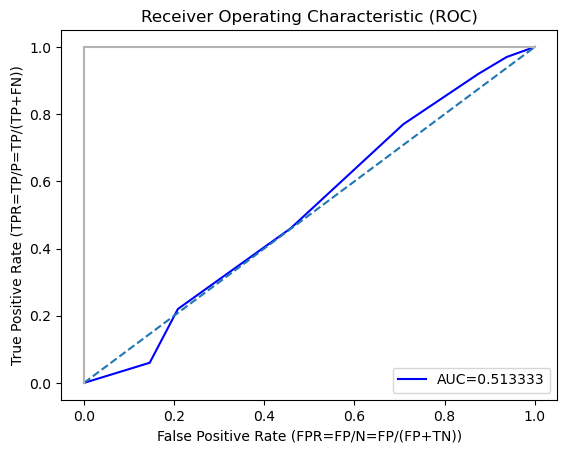

In [46]:
y_score = KNNmodel.predict_proba (test[f])[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve (test["Loan_Status"], y_score)
plt.title('Receiver Operating Characteristic (ROC)') 
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label="AUC=%f"%roc_auc)
plt.legend (loc='lower right')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c="0.7")
plt.plot([1, 1], c="0.7")
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))') 
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')


In [47]:
print(cross_val_score(KNNmodel, final_Dataset [f], final_Dataset["Loan_Status"], cv=5, scoring="recall"))

[0.92771084 0.85365854 0.91463415 0.86585366 0.8902439 ]


In [48]:
print(cross_val_score(KNNmodel, final_Dataset [f], final_Dataset ["Loan_Status"], cv=5, scoring="precision"))

[0.7        0.72164948 0.69444444 0.67619048 0.70192308]


In [49]:
print("Accuracy of k-NN classifier: ", acc_knn) 

Accuracy of k-NN classifier:  0.6621621621621622


In [50]:
print(classification_report(test["Loan_Status"], preds))

              precision    recall  f1-score   support

           0       0.43      0.12      0.19        48
           1       0.69      0.92      0.79       100

    accuracy                           0.66       148
   macro avg       0.56      0.52      0.49       148
weighted avg       0.60      0.66      0.59       148



### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
Decision_Tree=DecisionTreeClassifier()
Decision_Tree.fit(train[f], train["Loan_Status"])
prediction=Decision_Tree.predict(test[f])
acc_dtree=accuracy_score(test["Loan_Status"], prediction)

In [53]:
acc_dtree

0.722972972972973

In [54]:
print("Accuracy: ", Decision_Tree.score (test [f], test["Loan_Status"])) 
print(classification_report(test["Loan_Status"], prediction))

Accuracy:  0.722972972972973
              precision    recall  f1-score   support

           0       0.57      0.58      0.58        48
           1       0.80      0.79      0.79       100

    accuracy                           0.72       148
   macro avg       0.68      0.69      0.69       148
weighted avg       0.72      0.72      0.72       148



### Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LogisticRegressionModel=LogisticRegression (solver='lbfgs')
LogisticRegressionModel.fit(train [f], train["Loan_Status"])
print("The intercept for the model is:", LogisticRegressionModel.intercept_)
print("The coefficients for the model is: ", LogisticRegressionModel.coef_)
predictions=LogisticRegressionModel.predict(test[f])
acc_lr=accuracy_score (test["Loan_Status"], predictions) 

The intercept for the model is: [-0.77757731]
The coefficients for the model is:  [[-3.26364933e-05  1.05188788e-04  2.23886913e-04  1.86369143e+00
   1.60421386e-01]]


In [57]:
acc_lr

0.7972972972972973

In [58]:
pd.crosstab(test["Loan_Status"], predictions, rownames=["Actual Loan_Status"], colnames=["Predicted Loan_Status"])

Predicted Loan_Status,0,1
Actual Loan_Status,,
0,27,21
1,9,91


In [59]:
lin_mse = mean_squared_error(predictions, test["Loan_Status"])
lin_rmse=np.sqrt(lin_mse)
print('Logistic Regression RMSE: %.4f'% lin_rmse)

Logistic Regression RMSE: 0.4502


In [60]:
print ("Prediction: ", predictions)
print('Logistic Regression R squared: %.4f' % LogisticRegressionModel.score (test [f], test["Loan_Status"]))

Prediction:  [1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1]
Logistic Regression R squared: 0.7973


In [61]:
print("Accuracy: ", LogisticRegressionModel.score (test [f], test["Loan_Status"]))
print(classification_report (test["Loan_Status"], predictions))

Accuracy:  0.7972972972972973
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        48
           1       0.81      0.91      0.86       100

    accuracy                           0.80       148
   macro avg       0.78      0.74      0.75       148
weighted avg       0.79      0.80      0.79       148



In [62]:
print("KNN: ", acc_knn)
print("LR: ", acc_lr) 
print("DTree:", acc_dtree)

KNN:  0.6621621621621622
LR:  0.7972972972972973
DTree: 0.722972972972973
